In [1]:
import finesse
import finesse.analysis.actions as fac
import matplotlib.pylab as plt
import finesse.components as fc
import finesse.detectors as det
finesse.configure(plotting=True)


In [4]:
# In this notebook, we will solve the quiz1 from the Finesse workshop.

# TASK 1: Build a model similar to the example in the workshop, but with an EOM inserted before the cavity.

eom_model=finesse.Model()

LASER = eom_model.add(fc.Laser("LASER", P=1e-3,phase=0))

EOM= eom_model.add(fc.modulator.Modulator("EOM", mod_type="pm", midx=0.05, f=13e6, phase=0))

sLASER_EOM=eom_model.add(fc.Space('sLASER_EOM',portA=LASER.p1,portB=EOM.p1,L=1)) #L=0 by default


M1 = eom_model.add(fc.Mirror("M1", R=0.99, L=0))
sEOM_M1=eom_model.add(fc.Space('sEOM_M1',portA=EOM.p2,portB=M1.p1,L=1)) #L=0 by default
M2 = eom_model.add(fc.Mirror("M2", R=0.999, L=0))
sM1_M2=eom_model.add(fc.Space('sM1_M2',portA=M1.p2,portB=M2.p1,L=1))

# ADD the cavity command and the photodetector

eom_model.add(det.PowerDetector('pdinc', M1.p1.i)); # Incident power
eom_model.add(det.PowerDetector('pdrefl', M1.p1.o)); # Reflected power
eom_model.add(det.PowerDetector('pdtrans', M2.p2.o)); # transmitted power
eom_model.add(det.PowerDetector('pdcirc', M1.p2.i)); # Circulating power

# # now, this all was using planewaves. We can switch to Gaussian beams.
# # First, we need to assign radii of curvature to the mirrors.
eom_model.M1.Rc = -0.7  # Radius of curvature for M1 in meters
eom_model.M2.Rc = 0.7  # Radius of curvature for M2 in meters

eom_model.add(fc.Cavity('cavity', source=eom_model.M1.p2.o))



<'cavity' @ 0x140d6f0d0 (Cavity)>

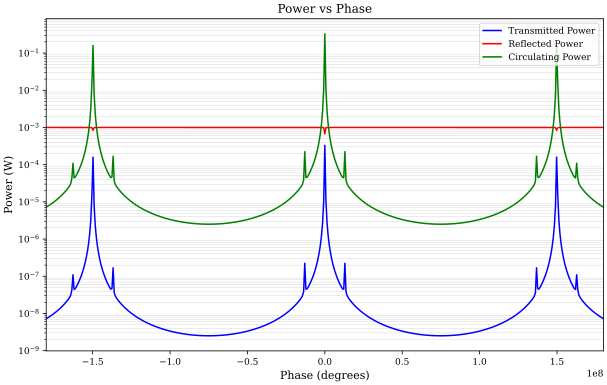

In [10]:
# TASK 2: Scan the laser's frequency, or the cavity's length, and see the sidebands in the spectrum.

out = eom_model.run(fac.Xaxis(LASER.f,'lin', -180e6, 180e6, 500))
x_axis=out.x1
pdtrans=out['pdtrans']
pdrefl=out['pdrefl']
pdcirc=out['pdcirc']    
# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogy(x_axis, pdtrans, label='Transmitted Power', color='blue')
plt.plot(x_axis, pdrefl, label='Reflected Power', color='red')
plt.plot(x_axis, pdcirc, label='Circulating Power', color='green')
plt.xlabel('Phase (degrees)')
plt.ylabel('Power (W)')
plt.title('Power vs Phase')
plt.legend()
plt.grid()
plt.show()

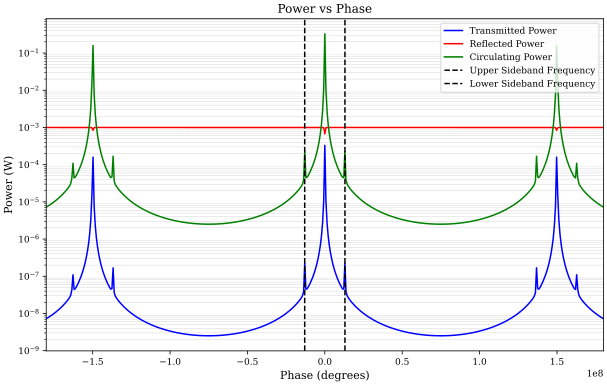

In [ ]:
# TASK3
# Confirm that the sidebands are at the expected frequencies. You can add a vertical line at the expected frequency using the following command:
# plt.axvline(x=expected_frequency, color='r', linestyle='--', label='Expected Frequency of SB')



plt.figure(figsize=(10, 6))
plt.semilogy(x_axis, pdtrans, label='Transmitted Power', color='blue')
plt.plot(x_axis, pdrefl, label='Reflected Power', color='red')
plt.plot(x_axis, pdcirc, label='Circulating Power', color='green')
plt.axvline(x=eom_model.EOM.f, color='black', linestyle='--', label='Upper Sideband Frequency')
plt.axvline(x=-eom_model.EOM.f, color='black', linestyle='--', label='Lower Sideband Frequency')
plt.xlabel('Phase (degrees)')
plt.ylabel('Power (W)')
plt.title('Power vs Phase')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Bonus Task: Add an amplitude detector and measure the power in the carrier and sidebands.
